# Benchmarking of the law libraries of the University of Antwerp and the University of Hasselt

#### Purpose of the study

This study uses the bibliographic data from the Anet catalogue, managed by the library system Brocade (dataset on 30/6/2021).
The dataset is exported as a SQLite database and queried with the help of Python libraries (sqlite3, numpy, pandas and matplotlib).

#### Parameters

- Limitation of the analysis to part of the paper book collections, namely the monographs and the reference works present in the reading rooms. 

- The call numbers labels in both institutions are formed by the acronym of the collection (in both cases this is RECH), by the UDC code (e.g. 34), by a letter  (each type of publication has a specific letter, e.g. E for journals, G for monographs, A for reference works, etc.), and by the year of publication. This study concerns all letters, except the E. The reason for excluding the journals is that these publications do not have a year on the label and in most cases no author/editor in the bibliographic description.  


## Querying the dataset

The following queries are launched on the SQlite database:

- Query 1 : size of the collection 
- Query 2 : authors and editors 
- Query 3 : publishers
- Query 4 : year of publication
- Query 5 : language of content
- Query 6 : subject description


### Query 1 : Size of the collection

This query concerns the number of bibliographic descriptions (the catalog records in the Brocade library system) and not the number of items. In other words, each description has one or more items attached to it.


In [2]:
# Query 1 : Size of the collection

import sqlite3
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

PATH_TO_DB = '/Users/lmaggior/OneDrive - Universiteit Antwerpen/programmeren/sqlite/UA_UH.sqlite'

conn = sqlite3.connect(PATH_TO_DB)
cursor = conn.cursor()

#  query UAntwerpen

query_ua = '''
SELECT 
    count(holding.cloi)
FROM holding
WHERE 
    ((holding_ty like 'rech-%' 
    and holding_ty not like 'rech-e%')
    or (holding_ty like 'sr-%'
    and holding_ty not like 'sr-e%'))
    and lib like 'UA-CST'
'''

cursor.execute(query_ua)
data_ua = [row for row in cursor.fetchall()]
print(f"Number of titles (bibliographic records) - UAntwerpen collection: {data_ua[0][0]}")

#  query RBLimburg

query_rbl = ''' 
SELECT 
    count(holding.cloi)
FROM holding
WHERE 
    (holding_ty like 'rech-%' and holding_ty not like 'rech-e%') 
    and lib like 'RBL' 
'''

cursor.execute(query_rbl)
data_rbl = [row for row in cursor.fetchall()]
print(f"Number of titles (bibliographic records) - RBLimburg collection: {data_rbl[0][0]}")


Number of titles (bibliographic records) - UAntwerpen collection: 38529
Number of titles (bibliographic records) - RBLimburg collection: 11940


#### Conclusion

The UAntwerpen collection is larger, but there are historical explanations for this difference. It originated in the 70s of last century, while that of RBLimburg only came into being in 2012 (RBLimburg only consisted of the law collection of UHasselt at that time, because the collections of the other foundation partners had not yet been inventoried or catalogued). 


### Query 2 : Authors and editors  

This query examines which authors and editors are most common in the two collections (top 20). 
A graphic representation of the top 5 is also shown.

Note: the cataloguing rules changed in June 2013. The cataloguers now have to record all authors/editors mentioned on the title page, whereas in the past they had to limit themselves to the first three authors/editors.



Top 20 authors and editors - UAntwerpen collection:  
Blanpain, Roger        180
Verbeke, Alain L.      101
Hubeau, Bernard         82
Fontaine, Marcel        81
Dujardin, Jean          73
Tilleman, Bernard       71
Dubuisson, Bernard      65
Leval, de, Georges      63
Ruysschaert, Stefan     62
Storme, Marcel          59
Verougstraete, Ivan     57
Klip, André             56
Sagaert, Vincent        54
Dirix, Eric             51
Senaeve, Patrick        49
Janvier, Ria            48
Vanhees, Hendrik        46
Stijns, Sophie          45
Alen, André             45
Schwarze, Jürgen        44

Top 20 authors and editors - RBLimburg collection: 
Verbeke, Alain L.        109
Tilleman, Bernard         84
Dirix, Eric               66
Senaeve, Patrick          60
Blanpain, Roger           58
Sagaert, Vincent          57
Culot, André              56
Gilson, Steve             56
Hubeau, Bernard           54
Leleu, Yves-Henri         54
Leval, de, Georges        50
Stijns, Sophie            45
Verou

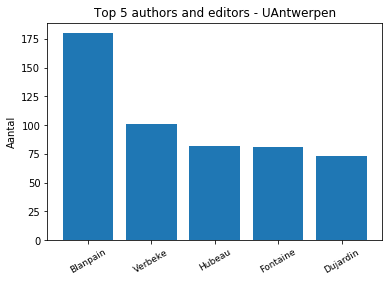

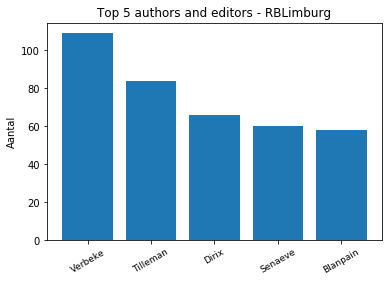

In [3]:
# Query 2 : Authors and editors 

# query UAntwerpen

query_ua = '''
SELECT DISTINCT
    token.cloi,
    author_fn || ', ' || author_vn as author_name,
    author_fu,
    lib
FROM token
JOIN 
    author on token.cloi = author.cloi
JOIN 
    holding on author.cloi = holding.cloi 
WHERE 
    (author_fu like 'aut' or author_fu like 'edt') 
    and author_fn not like 'e.a.'
    and lib like 'UA-CST' 
    and ((holding_ty like 'rech-%' and holding_ty not like 'rech-e%') 
    or (holding_ty like 'sr-%' and holding_ty not like 'sr-e%'))
'''
cursor.execute(query_ua)
data_ua = {row for row in cursor.fetchall()}
frame_ua = pd.DataFrame(data_ua, columns= ['cloi', 'naam', 'auteurfunctie', 'lib'])
ua_aut = frame_ua['naam'].value_counts()
print("\033[1m" + f'Top 20 authors and editors - UAntwerpen collection: \033[0m \n{(ua_aut.head(20)).to_string()}\n')

# query RBLimburg

query_rbl = '''
SELECT DISTINCT
    token.cloi,
    author_fn || ', ' || author_vn as author_name,
    author_fu,
    lib
FROM token
JOIN 
    author on token.cloi = author.cloi
JOIN 
    holding on author.cloi = holding.cloi 
WHERE 
    (author_fu like 'aut' or author_fu like 'edt') 
    and author_fn not like 'e.a.'
    and lib like 'RBL' and (holding_ty like 'rech-%' and holding_ty not like 'rech-e%') 
 '''
cursor.execute(query_rbl)
data_rbl = {row for row in cursor.fetchall()}
frame_rbl = pd.DataFrame(data_rbl, columns= ['cloi', 'naam', 'auteurfunctie', 'lib'])
rbl_aut = frame_rbl['naam'].value_counts()
print("\033[1m" + f'Top 20 authors and editors - RBLimburg collection:\033[0m \n{(rbl_aut.head(20)).to_string()}\n')


# graphs

bars_ua = ['Blanpain', 'Verbeke', 'Hubeau', 'Fontaine', 'Dujardin']
bars_rbl = ['Verbeke', 'Tilleman', 'Dirix', 'Senaeve', 'Blanpain']

def graph(height, bars, title, index):
    plt.bar(index, height)
    plt.ylabel("Aantal")
    plt.xticks(index, bars, rotation=30, fontsize=9)
    plt.title
    return plt.show()

graph(ua_aut.head(), bars_ua, plt.title('Top 5 authors and editors - UAntwerpen'), index = np.arange(5))

graph(rbl_aut.head(), bars_rbl, plt.title('Top 5 authors and editors - RBLimburg'), index = np.arange(5))




## Query 3 : Publishers

This query examines by which publishers the monographs were published (top 10). Unfortunately, the data is incomplete because the cataloguers in the past did not always fill in the field of the publisher (if the corporative author was the same as the publisher, the latter did not have to be recorded). There have also been typos by the cataloguers. Furthermore, the name of the publisher may have changed over time, so that the data is not always counted together. Finally, other cataloguing rules have also changed in recent years. Until 2013, the cataloguers had to 'normalize' the name of the publisher, while they now have to record the name in full from the title page. 
But we assume that these errors have been minimal. In addition, in the data processing via pandas we could limit these discrepancies. The limitation of the analysis to the period 2011-2021 has also solved many of these inconsistencies.
A graphic representation of the top 5 is also shown.


Top 10 publishers - UAntwerpen collection (from 2011):  
Intersentia                1049
Larcier                     991
Die Keure                   600
Bruylant                    516
Wolters Kluwer              371
Maklu                       226
Kluwer                      204
Oxford University Press     163
LGDJ                        156
Edward Elgar Publishing     137

Top 10 publishers - RBLimburg collection (from 2011):  
Larcier                    1200
Bruylant                    760
Intersentia                 757
Die Keure                   593
Anthemis                    525
Wolters Kluwer              396
Kluwer                      251
Maklu                        90
Oxford University Press      67
Acco                         41



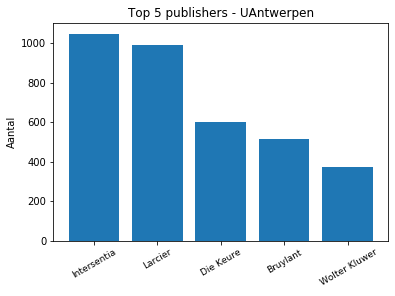

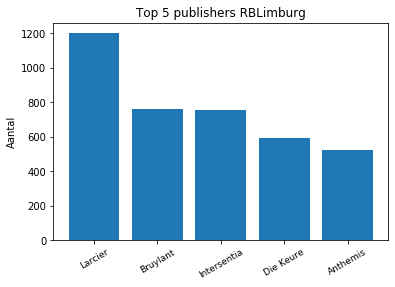

In [8]:
# Query 3 : Publishers

# function to eliminate discrepancies in the name of the publishers

def clean_frame(frame):
    for char in ['-', '']:
        frame = frame.replace(char, np.nan)
    to_replace = [{'die Keure':'Die Keure'},
                {'die Keure Professional Publishing':'Die Keure'},
                {'larcier':'Larcier'},
                {'LGDJ, une marque de Lextenso':'LGDJ'},
                {'LGDJ, un savoir-faire de Lextenso':'LGDJ'},
                {'larcier':'Larcier'},
                {'larcier':'Larcier'},
                {'bruylant':'Bruylant'},
                {'LGDJ Lextenso':'LGDJ'},
                {'LGDJ, Lextenso éditions':'LGDJ'},
                {'intersentia':'Intersentia'},
                {'Elgar':'Edward Elgar Publishing'},
                {'Edward Elgar':'Edward Elgar Publishing'},
                {'Larcier Legal':'Larcier'},
                {'la Charte':'Die Keure'}]
    for item in to_replace:
        frame["impressum_ug"].replace(item,  inplace=True)
    return frame

# query UAntwerpen

query_ua = '''
SELECT DISTINCT
    token.cloi,
    impressum_ju1sv,
    impressum_ug
FROM token
JOIN 
    impressum on token.cloi = impressum.cloi
JOIN 
    holding on impressum.cloi = holding.cloi
WHERE 
    ((holding_ty like 'rech-%' and holding_ty not like 'rech-e%') 
    or (holding_ty like 'sr-%' and holding_ty not like 'sr-e%'))  
    and lib like 'UA-CST'
'''

cursor.execute(query_ua)
data_ua = {row for row in cursor.fetchall()}

frame_ua = pd.DataFrame(data_ua, columns= ['cloi', 'impressum_ju1sv', 'impressum_ug'])
frame_ua = clean_frame(frame_ua)
ua_uitgevers_filt = frame_ua[frame_ua.impressum_ju1sv > '2010']
ua_uitgevers = ua_uitgevers_filt['impressum_ug'].value_counts()
print("\033[1m" + f'Top 10 publishers - UAntwerpen collection (from 2011):\033[0m  \n{(ua_uitgevers.head(10)).to_string()}\n')


# query RBLimburg

query_rbl = '''
SELECT DISTINCT
    token.cloi,
    impressum_ju1sv,
    impressum_ug
FROM token
JOIN
    impressum on token.cloi = impressum.cloi
JOIN 
    holding on impressum.cloi = holding.cloi
WHERE 
    (holding_ty like 'rech-%' and holding_ty not like 'rech-e%') 
    and lib like 'RBL'
'''

cursor.execute(query_rbl)
data_rbl = {row for row in cursor.fetchall()}
frame_rbl = pd.DataFrame(data_rbl, columns= ['cloi', 'impressum_ju1sv', 'impressum_ug'])
frame_rbl = clean_frame(frame_rbl)
rbl_uitgevers_filt = frame_rbl[frame_rbl.impressum_ju1sv > '2010']
rbl_uitgevers = rbl_uitgevers_filt['impressum_ug'].value_counts()

print("\033[1m" + f'Top 10 publishers - RBLimburg collection (from 2011):\033[0m  \n{(rbl_uitgevers.head(10)).to_string()}\n')


# graphs

bars_ua = ['Intersentia', 'Larcier', 'Die Keure',  'Bruylant', ' Wolter Kluwer']
bars_rbl = ['Larcier', 'Bruylant', 'Intersentia', 'Die Keure', 'Anthemis']

graph(ua_uitgevers.head(5), bars_ua,
plt.title('Top 5 publishers - UAntwerpen'), index = np.arange(5))

graph(rbl_uitgevers.head(5), bars_rbl ,
plt.title('Top 5 publishers RBLimburg'), index = np.arange(5))


## Query 4 : Year of publication

The aim of this query is to check how many books published in the period 2011-2021 ended up in the collections. This makes it possible to measure the performance in terms of recent literature. 
A graphical representation of the data is also shown.


Year of publications - UAntwerpen collection (2011-2021):  
2015    737
2014    690
2012    687
2016    639
2017    621
2011    614
2013    609
2019    560
2018    532
2020    455
2021    142

Number of titels:  6286

Year of publications - RBLimburg collection (2011-2021):  
2012    714
2013    622
2011    599
2015    584
2014    570
2016    541
2017    501
2019    491
2018    469
2020    420
2021    125

Number of titles:  5636



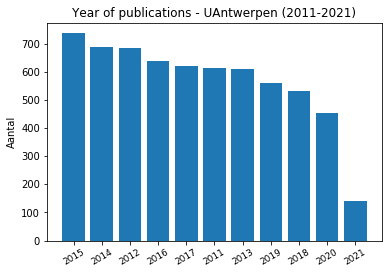

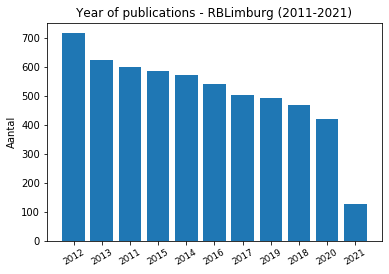

In [5]:
# Query 4: Year of publication

# query UAntwerpen

query_ua = '''
SELECT DISTINCT
    token.cloi,
    impressum_ju1sv
FROM token
JOIN 
    impressum on token.cloi = impressum.cloi
JOIN 
    holding on impressum.cloi = holding.cloi
WHERE 
    ((holding_ty like 'rech-%' and holding_ty not like 'rech-e%')
    or (holding_ty like 'sr-%' and holding_ty not like 'sr-e%'))  
    and lib like 'UA-CST'
'''

cursor.execute(query_ua)
data_ua = {row for row in cursor.fetchall()}
frame_ua = pd.DataFrame(data_ua, columns= ['cloi', 'impressum_ju1sv'])
ua_jvu_filt = frame_ua[frame_ua.impressum_ju1sv > '2010']
ua_jvu = ua_jvu_filt['impressum_ju1sv'].value_counts()
ua_jvu_som = sum(ua_jvu)
print("\033[1m" + f'Year of publications - UAntwerpen collection (2011-2021):\033[0m  \n{ua_jvu.to_string()}\n')
print("\033[1m" + f'Number of titels:\033[0m  {ua_jvu_som}\n')

# query RBLimburg

query_rbl = '''
SELECT DISTINCT
    token.cloi,
    impressum_ju1sv
FROM token
JOIN 
    impressum on token.cloi = impressum.cloi
JOIN 
    holding on impressum.cloi = holding.cloi
WHERE 
    (holding_ty like 'rech-%' and holding_ty not like 'rech-e%') 
    and lib like 'RBL'
'''
cursor.execute(query_rbl)
data_rbl = {row for row in cursor.fetchall()}
frame_rbl = pd.DataFrame(data_rbl, columns= ['cloi', 'impressum_ju1sv'])
rbl_jvu_filt = frame_rbl[frame_rbl.impressum_ju1sv > '2010']
rbl_jvu = rbl_jvu_filt['impressum_ju1sv'].value_counts()
rbl_jvu_som = sum(rbl_jvu)

print("\033[1m" + f'Year of publications - RBLimburg collection (2011-2021):\033[0m  \n{rbl_jvu.to_string()}\n')
print("\033[1m" + f'Number of titles:\033[0m  {rbl_jvu_som}\n')

# graphs

bars_ua = ['2015', '2014', '2012', '2016', '2017', '2011', '2013', '2019', '2018', '2020', '2021']
bars_rbl = ['2012', '2013', '2011', '2015', '2014', '2016', '2017', '2019', '2018', '2020', '2021']

graph(ua_jvu, bars_ua, plt.title('Year of publications - UAntwerpen (2011-2021)'), index = np.arange(11))
graph(rbl_jvu, bars_rbl, plt.title('Year of publications - RBLimburg (2011-2021)'), index = np.arange(11))


## Query 5 : Language of content 

This query calculates which are the most common languages in the two collections. This calculation concerns the language of the content and not the language of the title.
A graphic representation of the top six is also shown.


Top 6 languages of content - UAntwerpen collection:  
dut    12637
eng    10466
fre    10152
ger     3964
ita      171
lat       80

Top 6 languages of content - RBLimburg collection:  
dut    6610
fre    3999
eng    1463
ger      72
mul      14
ita       9



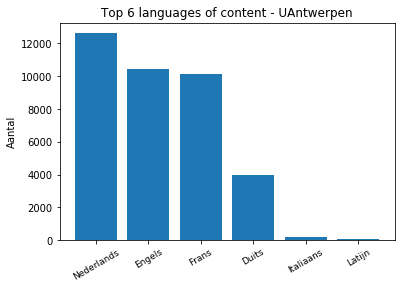

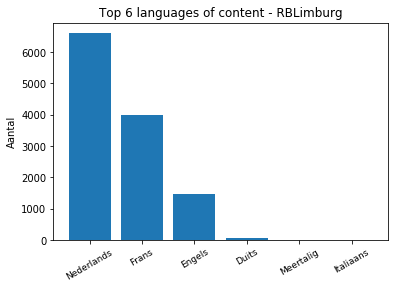

In [9]:
# Query 5 : Language of content 

# query UAntwerpen

query_ua = '''
SELECT DISTINCT
    token.cloi,
    language_lg
FROM token
JOIN 
    language on token.cloi = language.cloi
JOIN 
    holding on language.cloi = holding.cloi
WHERE 
    ((holding_ty like 'rech-%' and holding_ty not like 'rech-e%')
    or (holding_ty like 'sr-%' and holding_ty not like 'sr-e%'))
    and lib like 'UA-CST'
'''
cursor.execute(query_ua)
data_ua = {row for row in cursor.fetchall()}
frame_ua = pd.DataFrame(data_ua, columns= ['cloi', 'language_lg'])
ua_lang = frame_ua['language_lg'].value_counts()

print("\033[1m" + f'Top 6 languages of content - UAntwerpen collection:\033[0m  \n{(ua_lang.head(6)).to_string()}\n')


# query RBLimburg

query_rbl = '''
SELECT DISTINCT
    token.cloi,
    language_lg
FROM token
JOIN 
    language on token.cloi = language.cloi
JOIN 
    holding on language.cloi = holding.cloi
WHERE 
    (holding_ty like 'rech-%' and holding_ty not like 'rech-e%') 
    and lib like 'RBL'
'''
cursor.execute(query_rbl)
data_rbl = {row for row in cursor.fetchall()}
frame_rbl = pd.DataFrame(data_rbl, columns= ['cloi', 'language_lg'])
rbl_lang = frame_rbl['language_lg'].value_counts()

print("\033[1m" + f'Top 6 languages of content - RBLimburg collection:\033[0m  \n{(rbl_lang.head(6)).to_string()}\n')

# graphs

bars_ua = ['Nederlands', 'Engels', 'Frans', 'Duits', 'Italiaans', 'Latijn']
bars_rbl = ['Nederlands', 'Frans', 'Engels', 'Duits', 'Meertalig', 'Italiaans']

graph(ua_lang.head(6), bars_ua, plt.title('Top 6 languages of content - UAntwerpen'), index = np.arange(6))
graph(rbl_lang.head(6), bars_rbl, plt.title('Top 6 languages of content - RBLimburg'), index = np.arange(6))


## Query 6 : Subject description 

This query examines which UDC codes (top 20) were used in Brocade to describe the two collections. In this way, the key elements of research and education can be reconstructed, knowing of course that donations or one-off research projects can have an influence on collection building.
A graphical representation of the top five is shown.


Top 20 UDC codes - UAntwerpen collection:  
Sociaal recht. Arbeidsrecht                      2719
Rechtstheorie. Rechtsmethode. Rechtsfilosofie    2541
Strafrecht. Strafprocesrecht                     2448
Economisch recht                                 2410
Verbintenissenrecht. Contractenrecht             2308
Gerechtelijk privaatrecht                        2264
Administratief recht                             2030
Fiscaal recht                                    2002
Fundamentele rechten en vrijheden                1844
Europees recht                                   1821
Publiek recht. Staatsrecht                       1704
Vennootschapsrecht. Verenigingsrecht             1595
Familierecht. Erfrecht                           1581
Industriële en intellectuele eigendom            1269
Financieel recht                                 1262
Internationaal recht                             1090
Onrechtmatige daad                                983
Zakenrecht                            

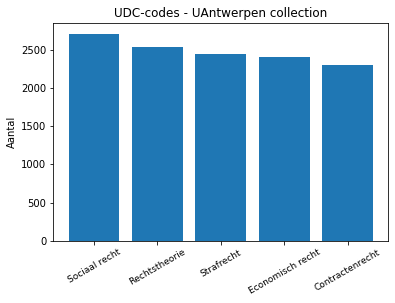

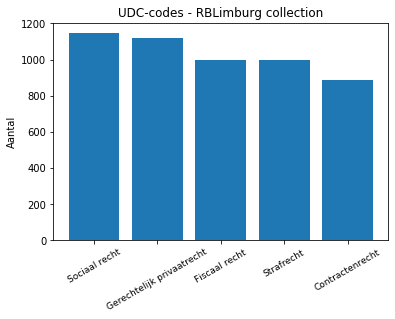

In [7]:
from plotly.graph_objs import Bar, Layout

# Query 6 : Subject description 

# query UAntwerpen

query_ua = '''
SELECT DISTINCT 
    token.cloi, 
    subject_ty, 
    subject_ac, 
    subject_vw,
    lib
FROM token
JOIN 
    holding on token.cloi = holding.cloi
JOIN 
    subject on token.cloi = subject.cloi 
WHERE 
    lib like "UA-CST" 
    and ((holding_ty like 'rech-%' and holding_ty not like 'rech-e%')
    or (holding_ty like 'sr-%' and holding_ty not like 'sr-e%'))
    and subject_ty like "U" 
'''

cursor.execute(query_ua)
data_ua = {row for row in cursor.fetchall()}
frame_ua = pd.DataFrame(data_ua, columns= ['cloi', 'subject_ty', 'subject_ac', 'subject_vw', 'lib'])
ua_udc = frame_ua['subject_vw'].value_counts()

print("\033[1m" + f'Top 20 UDC codes - UAntwerpen collection: \033[0m \n{(ua_udc.head(20)).to_string()}\n')


# query RBLimburg

query_rbl = '''
SELECT DISTINCT 
    token.cloi, 
    subject_ty, 
    subject_ac, 
    subject_vw,
    lib
FROM token
JOIN 
    holding on token.cloi = holding.cloi
JOIN 
    subject on token.cloi = subject.cloi 
WHERE 
    lib like "RBL" 
    and (holding_ty like 'rech-%' and holding_ty not like 'rech-e%') 
    and subject_ty like "U" 
'''
cursor.execute(query_rbl)
data_rbl = {row for row in cursor.fetchall()}
frame_rbl = pd.DataFrame(data_rbl, columns= ['cloi', 'subject_ty', 'subject_ac', 'subject_vw', 'lib'])
rbl_udc = frame_rbl['subject_vw'].value_counts()

print("\033[1m" + f'Top 20 UDC codes - RBLimburg: \033[0m \n{(rbl_udc.head(20)).to_string()}\n')

# graphs

bars_ua = ['Sociaal recht', 'Rechtstheorie', 'Strafrecht', 'Economisch recht', 'Contractenrecht']
bars_rbl = ['Sociaal recht', 'Gerechtelijk privaatrecht', 'Fiscaal recht', 'Strafrecht', 'Contractenrecht']

graph(ua_udc.head(5), bars_ua, plt.title('UDC-codes - UAntwerpen collection'), index = np.arange(5))
graph(rbl_udc.head(5), bars_rbl, plt.title('UDC-codes - RBLimburg collection'), index = np.arange(5))
